**Import Dataset and Packages**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix, plot_roc_curve
from sklearn.impute import SimpleImputer


#Importing the data
df = pd.read_csv('credit_dataset.csv')

**Data Visualizations**

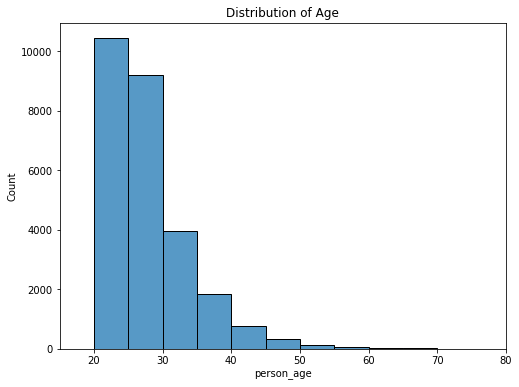

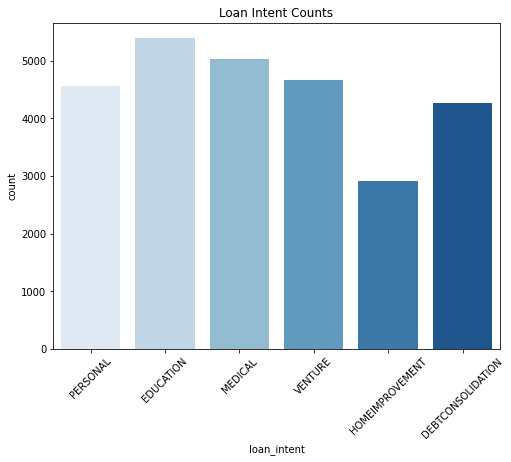

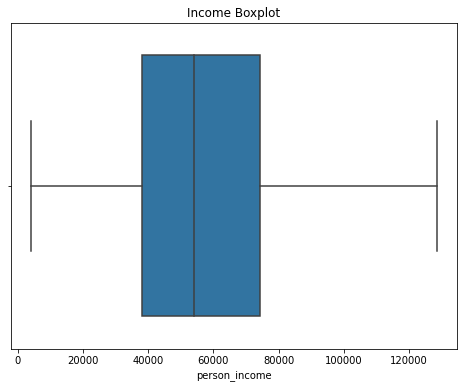

In [9]:

# 1. Histogram of person_age
plt.figure(figsize=(8, 6))
sns.histplot(df['person_age'], bins=range(0,101,5))  
plt.title('Distribution of Age')
plt.xlim(15, 80) 
plt.show()


# 2. Bar plot of loan_intent
plt.figure(figsize=(8, 6))
sns.countplot(x='loan_intent', data=df, palette='Blues')
plt.title('Loan Intent Counts')
plt.xticks(rotation=45)
plt.show()


# 3. Boxplot of person_income
# Calculate IQR
Q1 = df['person_income'].quantile(0.25)
Q3 = df['person_income'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove Outliers
df = df[(df['person_income'] >= lower_bound) & (df['person_income'] <= upper_bound)]

# Boxplot of person_income after outlier removal
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['person_income'])
plt.title('Income Boxplot')
plt.show()



**Random Forrest Training**

In [3]:
# Drop rows with missing values
df = df.dropna()


# Separate the features from the target
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# List categorical columns
cat_cols = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

# List numerical columns
num_cols = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

# Create a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(), cat_cols)])

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

# Train the model
pipeline.fit(X_train, y_train)

# Predict the test set results
y_pred = pipeline.predict(X_test)

# Check model performance
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.99      0.96      4290
           1       0.97      0.70      0.81      1171

    accuracy                           0.93      5461
   macro avg       0.95      0.85      0.88      5461
weighted avg       0.93      0.93      0.93      5461



**Outcome**

              precision    recall  f1-score   support

           0       0.92      0.99      0.96      4290
           1       0.96      0.70      0.81      1171

    accuracy                           0.93      5461
   macro avg       0.94      0.85      0.88      5461
weighted avg       0.93      0.93      0.93      5461



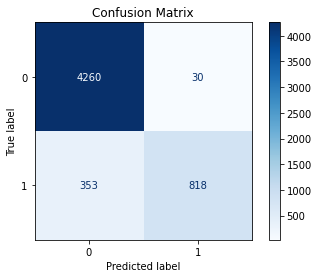

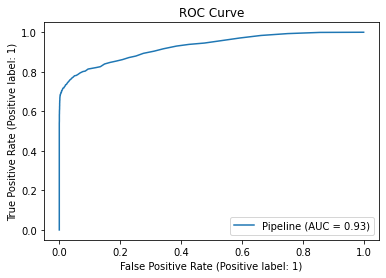

In [4]:

# Plot the confusion matrix
plot_confusion_matrix(pipeline, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Plot the ROC curve
plot_roc_curve(pipeline, X_test, y_test)
plt.title('ROC Curve')
plt.show()
